In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from itertools import product
import warnings
warnings.filterwarnings("ignore")


,Date,Intake Month,Country,Product,Net Customers,months_since_acquisition,churn_customers,Date_month,Date_year,Cohort_month,Cohort_year,Cohort_size,Cohort_name,retention_rate,retention_rate_6m,retention_rate_last,months_since_acquisition_last
1218,2019-01-31,2019-01-31,CA,A,17,0,0.0,1,2019,1,2019,17,Jan-19,100.000000,NaN,NaN,NaN
1219,2019-02-28,2019-01-31,CA,A,13,1,4.0,2,2019,1,2019,17,Jan-19,76.470588,NaN,NaN,NaN
1220,2019-03-31,2019-01-31,CA,A,12,2,1.0,3,2019,1,2019,17,Jan-19,70.588235,NaN,NaN,NaN
1221,2019-04-30,2019-01-31,CA,A,12,3,0.0,4,2019,1,2019,17,Jan-19,70.588235,NaN,NaN,NaN
1222,2019-05-31,2019-01-31,CA,A,11,4,1.0,5,2019,1,2019,17,Jan-19,64.705882,NaN,NaN,NaN
1223,2019-06-30,2019-01-31,CA,A,11,5,0.0,6,2019,1,2019,17,Jan-19,64.705882,NaN,NaN,NaN
1224,2019-07-31,2019-01-31,CA,A,11,6,0.0,7,2019,1,2019,17,Jan-19,64.705882,52.941176,64.705882,27.0
1225,2019-08-31,2019-01-31,CA,A,11,7,0.0,8,2019,1,2019,17,Jan-19,64.705882,52.941176,64.705882,27.0
1226,2019-09-30,2019-01-31,CA,A,10,8,1.0,9,2019,1,2019,17,Jan-19,58.823529,52.941176,64.705882,27.0
1227,2019-10-31,2019-01-31,CA,A,10,9,0.0,10,2019,1,2019,17,Jan-19,58.823529,52.941176,64.705882,27.0


In [34]:
df_1= pd.read_csv('dataset_1.csv',parse_dates=[0])
print(f"Shape: {df_1.shape}\n\ndtypes:\n{df_1.dtypes}\n")
df_1.head()

Shape: (252, 4)

dtypes:
Date       datetime64[ns]
Country            object
Product            object
Intake              int64
dtype: object



,Date,Country,Product,Intake
0,2019-01-31,US,A,110
1,2019-02-28,US,A,86
2,2019-03-31,US,A,92
3,2019-04-30,US,A,113
4,2019-05-31,US,A,124


In [35]:
df_1.shape,df_1.dtypes

((252, 4),
 Date       datetime64[ns]
 Country            object
 Product            object
 Intake              int64
 dtype: object)

In [36]:
df_2 = pd.read_csv('dataset_2.csv',parse_dates=[0,1])
print(f"Shape: {df_2.shape}\n\ndtypes:\n{df_2.dtypes}\n")
df_2.head()

Shape: (3654, 5)

dtypes:
Date             datetime64[ns]
Intake Month     datetime64[ns]
Country                  object
Product                  object
Net Customers             int64
dtype: object



,Date,Intake Month,Country,Product,Net Customers
0,2019-01-31,2019-01-31,US,A,110
1,2019-02-28,2019-01-31,US,A,88
2,2019-03-31,2019-01-31,US,A,83
3,2019-04-30,2019-01-31,US,A,77
4,2019-05-31,2019-01-31,US,A,75


In [37]:
# df_3[~df_3.Intake.isnull()]

In [38]:
# df_2['Date'] = pd.to_datetime(df_2['Date'])
# df_2['Intake Month'] = pd.to_datetime(df_2['Intake Month'])
# df_2 = df_2.sort_values(by=['Product','Country','Date','Intake Month']).reset_index(drop=True)
# df_2

In [39]:
df_2[df_2['Date']==df_2['Intake Month']]

,Date,Intake Month,Country,Product,Net Customers
0,2019-01-31,2019-01-31,US,A,110
28,2019-02-28,2019-02-28,US,A,86
55,2019-03-31,2019-03-31,US,A,92
81,2019-04-30,2019-04-30,US,A,113
106,2019-05-31,2019-05-31,US,A,124
...,...,...,...,...,...
3639,2020-12-31,2020-12-31,GB,C,58
3644,2021-01-31,2021-01-31,GB,C,59
3648,2021-02-28,2021-02-28,GB,C,60
3651,2021-03-31,2021-03-31,GB,C,61


In [40]:
# df_3 = df_2[df_2['Date']==df_2['Intake Month']].merge(df_1,how='left',on=['Date','Country','Product',])
# df_3[df_3['Net Customers']!=df_3['Intake']]

In [41]:
#df_2['months_since_acquisition'] = ((df_2['Date'] - df_2['Intake Month'])/np.timedelta64(1, 'M')).map(lambda x : np.round(x)).astype('int') #doesn't work because of rounding issues

def get_date_int(df, column):
   year = df[column].dt.year
   month = df[column].dt.month
   return year, month

# Get the integers for the date parts from the 'InvoiceMonth' column
date_year, date_month = get_date_int(df_2, 'Date')

# Get the integers for date parts from the 'Cohortmonth' column
cohort_year, cohort_month = get_date_int(df_2, 'Intake Month')

# Calculate difference in years
years_diff = date_year - cohort_year

# Calculate difference in months
months_diff = date_month - cohort_month

# Extract the difference in months from all previous values

df_2['months_since_acquisition'] = years_diff * 12 + months_diff
df_2.head()

,Date,Intake Month,Country,Product,Net Customers,months_since_acquisition
0,2019-01-31,2019-01-31,US,A,110,0
1,2019-02-28,2019-01-31,US,A,88,1
2,2019-03-31,2019-01-31,US,A,83,2
3,2019-04-30,2019-01-31,US,A,77,3
4,2019-05-31,2019-01-31,US,A,75,4


In [42]:
df_2[(df_2['Intake Month']=='2019-01-31')&(df_2.Product=='A')&(df_2.Country=='CA')]

,Date,Intake Month,Country,Product,Net Customers,months_since_acquisition
1218,2019-01-31,2019-01-31,CA,A,17,0
1219,2019-02-28,2019-01-31,CA,A,13,1
1220,2019-03-31,2019-01-31,CA,A,12,2
1221,2019-04-30,2019-01-31,CA,A,12,3
1222,2019-05-31,2019-01-31,CA,A,11,4
1223,2019-06-30,2019-01-31,CA,A,11,5
1224,2019-07-31,2019-01-31,CA,A,11,6
1225,2019-08-31,2019-01-31,CA,A,11,7
1226,2019-09-30,2019-01-31,CA,A,10,8
1227,2019-10-31,2019-01-31,CA,A,10,9


In [45]:
df_2['churn_customers'] = df_2.groupby(['Country','Product','Intake Month'])['Net Customers'].diff().abs().fillna(0)
df_2.head(10)

,Date,Intake Month,Country,Product,Net Customers,months_since_acquisition,churn_customers
0,2019-01-31,2019-01-31,US,A,110,0,0.0
1,2019-02-28,2019-01-31,US,A,88,1,22.0
2,2019-03-31,2019-01-31,US,A,83,2,5.0
3,2019-04-30,2019-01-31,US,A,77,3,6.0
4,2019-05-31,2019-01-31,US,A,75,4,2.0
5,2019-06-30,2019-01-31,US,A,72,5,3.0
6,2019-07-31,2019-01-31,US,A,71,6,1.0
7,2019-08-31,2019-01-31,US,A,70,7,1.0
8,2019-09-30,2019-01-31,US,A,69,8,1.0
9,2019-10-31,2019-01-31,US,A,69,9,0.0


In [46]:
df_2['Date_month'] = df_2['Date'].dt.month
df_2['Date_year'] = df_2['Date'].dt.year
df_2['Cohort_month'] = df_2['Intake Month'].dt.month
df_2['Cohort_year'] = df_2['Intake Month'].dt.year
df_2

,Date,Intake Month,Country,Product,Net Customers,months_since_acquisition,churn_customers,Date_month,Date_year,Cohort_month,Cohort_year
0,2019-01-31,2019-01-31,US,A,110,0,0.0,1,2019,1,2019
1,2019-02-28,2019-01-31,US,A,88,1,22.0,2,2019,1,2019
2,2019-03-31,2019-01-31,US,A,83,2,5.0,3,2019,1,2019
3,2019-04-30,2019-01-31,US,A,77,3,6.0,4,2019,1,2019
4,2019-05-31,2019-01-31,US,A,75,4,2.0,5,2019,1,2019
...,...,...,...,...,...,...,...,...,...,...,...
3649,2021-03-31,2021-02-28,GB,C,47,1,13.0,3,2021,2,2021
3650,2021-04-30,2021-02-28,GB,C,44,2,3.0,4,2021,2,2021
3651,2021-03-31,2021-03-31,GB,C,61,0,0.0,3,2021,3,2021
3652,2021-04-30,2021-03-31,GB,C,44,1,17.0,4,2021,3,2021


In [47]:
#get cohort size
df = df_2.merge(df_1,how='left',left_on=['Intake Month','Country','Product'],right_on=['Date','Country','Product'])
df = df.drop(["Date_y"],axis=1).rename(columns={'Date_x':"Date","Intake":"Cohort_size"})
df.head()

,Date,Intake Month,Country,Product,Net Customers,months_since_acquisition,churn_customers,Date_month,Date_year,Cohort_month,Cohort_year,Cohort_size
0,2019-01-31,2019-01-31,US,A,110,0,0.0,1,2019,1,2019,110
1,2019-02-28,2019-01-31,US,A,88,1,22.0,2,2019,1,2019,110
2,2019-03-31,2019-01-31,US,A,83,2,5.0,3,2019,1,2019,110
3,2019-04-30,2019-01-31,US,A,77,3,6.0,4,2019,1,2019,110
4,2019-05-31,2019-01-31,US,A,75,4,2.0,5,2019,1,2019,110


In [48]:
df['Cohort_name'] = df['Intake Month'].dt.strftime('%b-%y')
df['retention_rate'] = 100 * df['Net Customers'] / df['Cohort_size']
# df['diff_retention_rate'] = df_retention_rates.groupby(['Product','Country','Intake Month'])['retention_rate'].diff()

# #we fillna with 0 but only on the ones where there is a retention rate (ex: for B Product, there is no retention rate so we keep NaN)
# df_retention_rates.loc[~df_retention_rates['retention_rate'].isnull(),'diff_retention_rate'] = df_retention_rates.loc[~df_retention_rates['retention_rate'].isnull(),'diff_retention_rate'].fillna(0)
# df.head()

,Date,Intake Month,Country,Product,Net Customers,months_since_acquisition,churn_customers,Date_month,Date_year,Cohort_month,Cohort_year,Cohort_size,Cohort_name,retention_rate
0,2019-01-31,2019-01-31,US,A,110,0,0.0,1,2019,1,2019,110,Jan-19,100.000000
1,2019-02-28,2019-01-31,US,A,88,1,22.0,2,2019,1,2019,110,Jan-19,80.000000
2,2019-03-31,2019-01-31,US,A,83,2,5.0,3,2019,1,2019,110,Jan-19,75.454545
3,2019-04-30,2019-01-31,US,A,77,3,6.0,4,2019,1,2019,110,Jan-19,70.000000
4,2019-05-31,2019-01-31,US,A,75,4,2.0,5,2019,1,2019,110,Jan-19,68.181818


In [49]:
# df[mask].loc[df['Intake Month']=='2019-01-31']

In [50]:
df[(df.Country=='CA')&(df.Product=='B')].sort_values(by='months_since_acquisition',ascending=False)

,Date,Intake Month,Country,Product,Net Customers,months_since_acquisition,churn_customers,Date_month,Date_year,Cohort_month,Cohort_year,Cohort_size,Cohort_name,retention_rate
1651,2021-04-30,2019-01-31,CA,B,0,27,0.0,4,2021,1,2019,0,Jan-19,NaN
1650,2021-03-31,2019-01-31,CA,B,0,26,0.0,3,2021,1,2019,0,Jan-19,NaN
1678,2021-04-30,2019-02-28,CA,B,0,26,0.0,4,2021,2,2019,0,Feb-19,NaN
1649,2021-02-28,2019-01-31,CA,B,0,25,0.0,2,2021,1,2019,0,Jan-19,NaN
1677,2021-03-31,2019-02-28,CA,B,0,25,0.0,3,2021,2,2019,0,Feb-19,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1952,2020-05-31,2020-05-31,CA,B,32,0,0.0,5,2020,5,2020,32,May-20,100.0
1964,2020-06-30,2020-06-30,CA,B,48,0,0.0,6,2020,6,2020,48,Jun-20,100.0
1975,2020-07-31,2020-07-31,CA,B,0,0,0.0,7,2020,7,2020,0,Jul-20,NaN
1985,2020-08-31,2020-08-31,CA,B,0,0,0.0,8,2020,8,2020,0,Aug-20,NaN


### Monthly cohorts by Country/Product

In [51]:

# sns.heatmap(cohort_size,
#                 annot=True, 
#                 cbar=False, 
#                 fmt='g', 
#                 cmap=white_cmap)

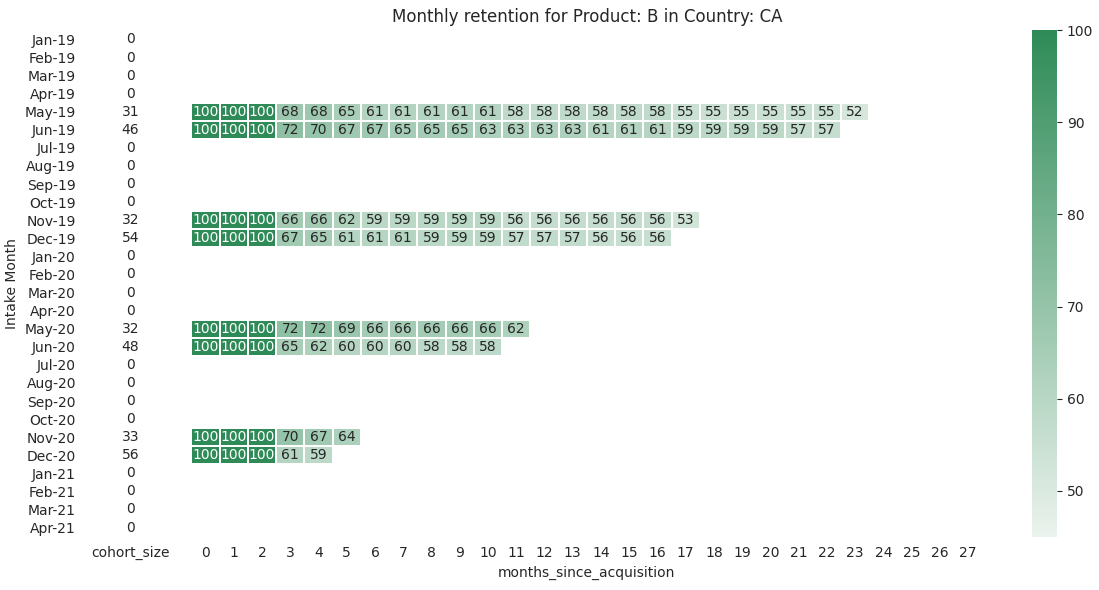

In [52]:
PRODUCT = 'B'
COUNTRY = 'CA'
TITLE=f"Monthly retention for Product: {PRODUCT} in Country: {COUNTRY}"

mask = (df.Country==COUNTRY)&(df.Product==PRODUCT)
# tmp2 = tmp2[tmp2.Country==COUNTRY].pivot(index='Intake Month', columns='months_since_acquisition', values='retention_rate')

tmp = df.loc[mask].pivot(index='Intake Month', columns='months_since_acquisition', values='retention_rate')
cohort_size = pd.DataFrame(df[mask].pivot(index='Intake Month', columns='months_since_acquisition', values='Cohort_size').iloc[:,0].astype(int)).rename(columns={0: 'cohort_size'})

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    seagreen_color = sns.light_palette("seagreen", as_cmap=True)

    sns.heatmap(data=tmp,
    annot = True,
    # cmap = 'Blues',
    cmap= seagreen_color,
    vmin = 45, #the min of the dataset
    vmax = 100.0,
    fmt = '.0f',
    linewidth = 0.3,
    yticklabels='',
    ax=ax[1])
    # sns.light_palette("seagreen", as_cmap=True)
    ax[1].set_title(TITLE, fontsize=12)
    ax[1].set(ylabel='')

    # cohort size
    white_cmap = mcolors.ListedColormap(['white'])

    sns.heatmap(cohort_size, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap,
                yticklabels=tmp.index.strftime('%b-%y').to_list(),
                ax=ax[0])

    fig.tight_layout()

### Monthly cohorts by Country

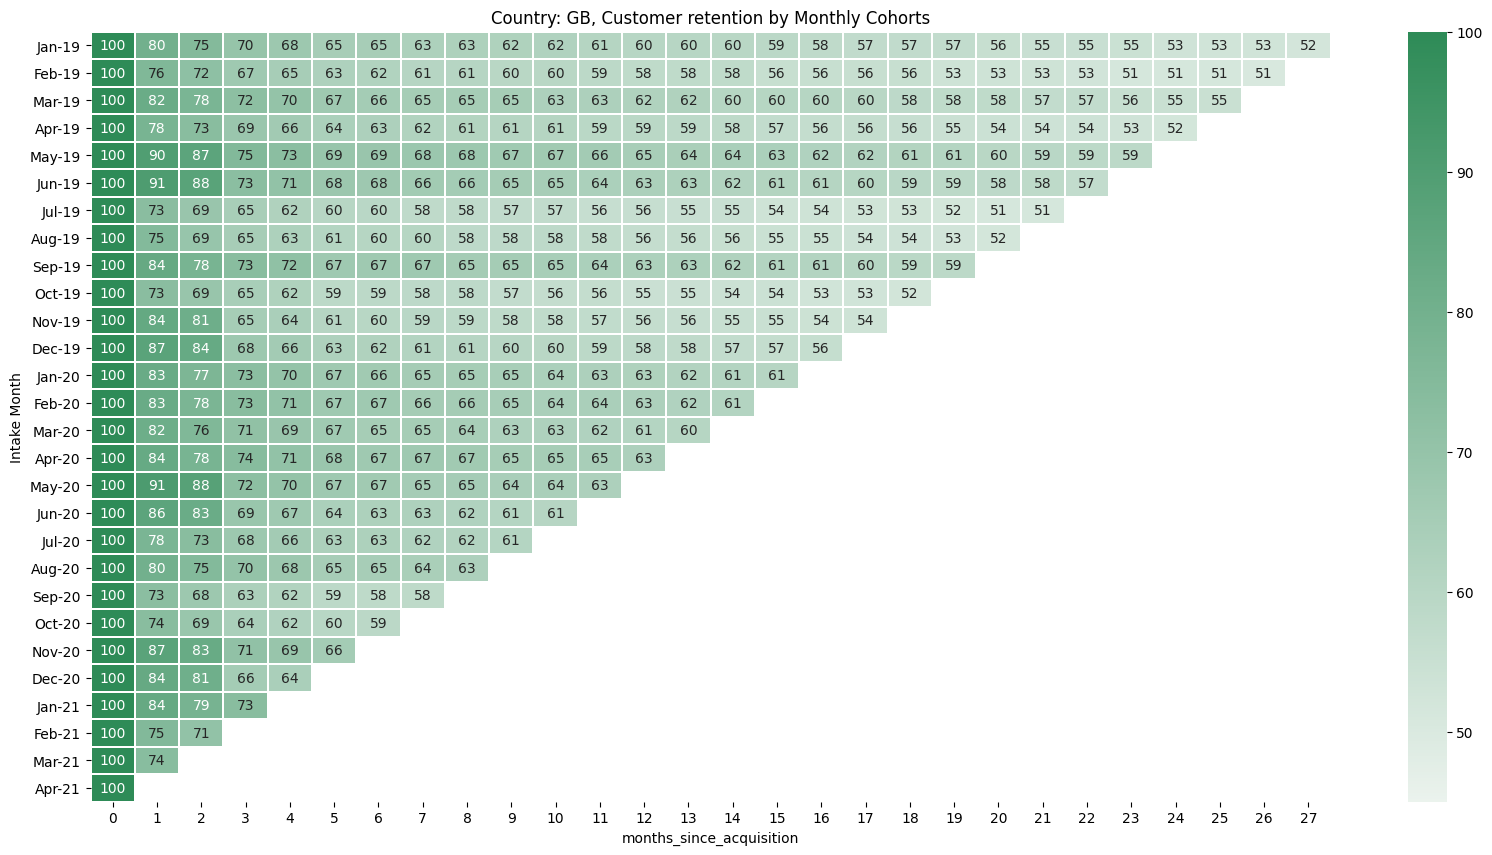

In [53]:
COUNTRY = 'GB'

tmp2 = df.groupby(['Country','Intake Month','months_since_acquisition'])['retention_rate'].mean().reset_index()

tmp2 = tmp2[tmp2.Country==COUNTRY].pivot(index='Intake Month', columns='months_since_acquisition', values='retention_rate')
# Initialize inches palot figure
plt.figure(figsize=(20,10))

# Add a title
plt.title(f'Country: {COUNTRY}, Customer retention by Monthly Cohorts')

# Create the heatmap
seagreen_color = sns.light_palette("seagreen", as_cmap=True)

sns.heatmap(data=tmp2,
annot = True,
# cmap = 'Blues',
cmap= seagreen_color,
vmin = 45, #the min of the dataset
vmax = 100.0,
fmt = '.0f',
linewidth = 0.3,
yticklabels=tmp2.index.strftime('%b-%y').to_list())
# sns.light_palette("seagreen", as_cmap=True)
plt.show();

## Monthly cohorts by Product

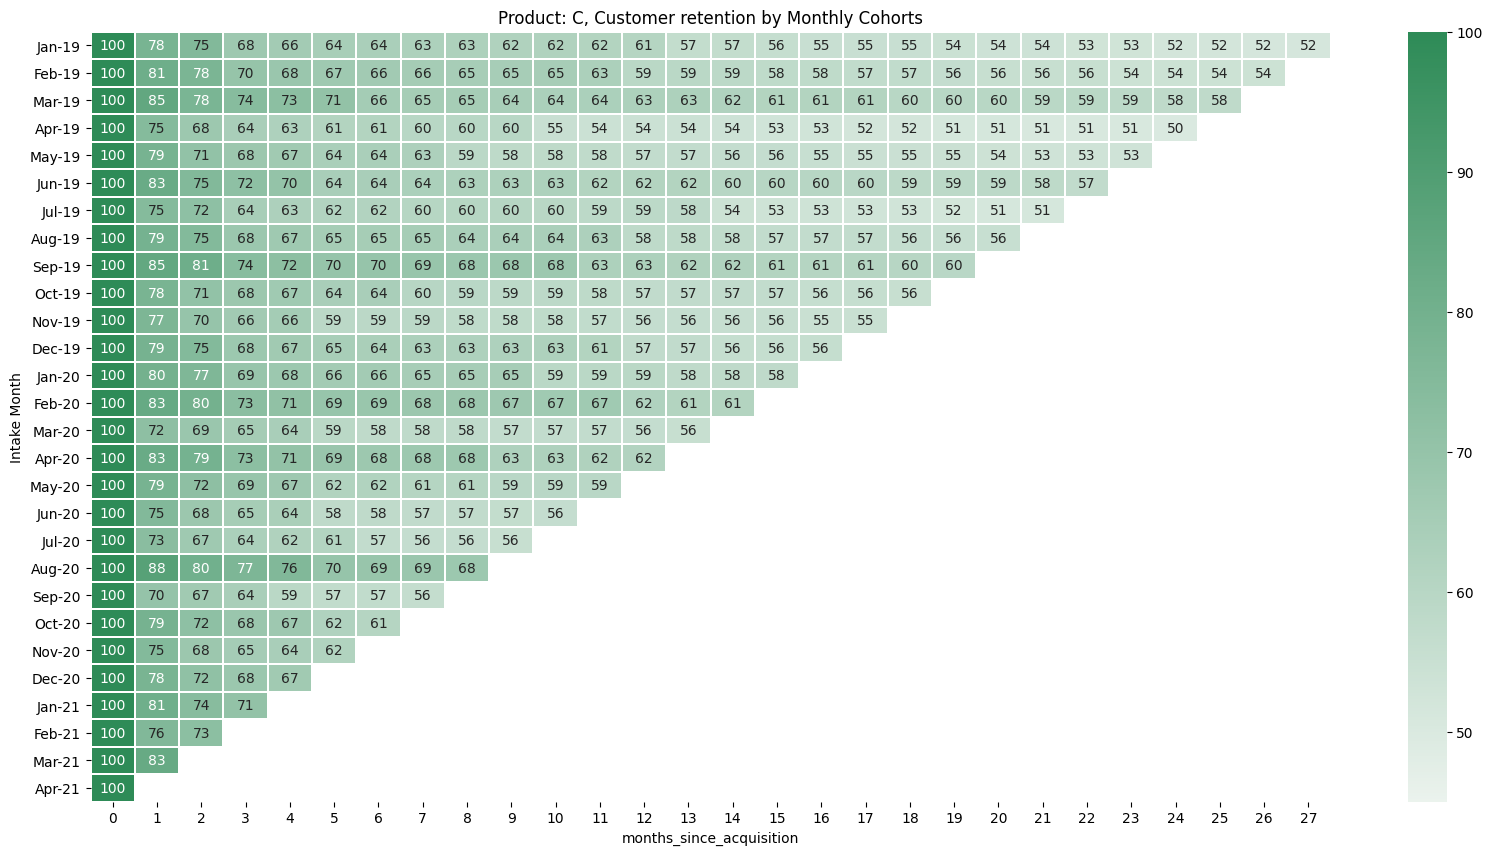

In [54]:
PRODUCT = 'C'

tmp3 = df.groupby(['Product','Intake Month','months_since_acquisition'])['retention_rate'].mean().reset_index()

tmp3 = tmp3[tmp3.Product==PRODUCT].pivot(index='Intake Month', columns='months_since_acquisition', values='retention_rate')
# Initialize inches palot figure
plt.figure(figsize=(20,10))

# Add a title
plt.title(f'Product: {PRODUCT}, Customer retention by Monthly Cohorts')

# Create the heatmap
seagreen_color = sns.light_palette("seagreen", as_cmap=True)

sns.heatmap(data=tmp3,
annot = True,
# cmap = 'Blues',
cmap= seagreen_color,
vmin = 45, #the min of the dataset
vmax = 100.0,
fmt = '.0f',
linewidth = 0.3,
yticklabels=tmp3.index.strftime('%b-%y').to_list())
# sns.light_palette("seagreen", as_cmap=True)
plt.show();

## Modelling

In [55]:
# df.to_csv('df_ret_rate.csv',index=False)

In [285]:
PRODUCT = 'A'
COUNTRY = 'CA'

mask = (df['Product']==PRODUCT) & (df['Country']==COUNTRY) #(df_2['Intake Month']==INTAKE_MONTH) & 

# mini_df = df.loc[mask,:]
mini_df = df.copy()
mini_df.head()

,Date,Intake Month,Country,Product,Net Customers,months_since_acquisition,churn_customers,Date_month,Date_year,Cohort_month,Cohort_year,Cohort_size,Cohort_name,retention_rate
0,2019-01-31,2019-01-31,US,A,110,0,0.0,1,2019,1,2019,110,Jan-19,100.000000
1,2019-02-28,2019-01-31,US,A,88,1,22.0,2,2019,1,2019,110,Jan-19,80.000000
2,2019-03-31,2019-01-31,US,A,83,2,5.0,3,2019,1,2019,110,Jan-19,75.454545
3,2019-04-30,2019-01-31,US,A,77,3,6.0,4,2019,1,2019,110,Jan-19,70.000000
4,2019-05-31,2019-01-31,US,A,75,4,2.0,5,2019,1,2019,110,Jan-19,68.181818


In [461]:
mini_df['Intake Month'].max()

Timestamp('2021-04-30 00:00:00')

In [286]:
# date_train_test_split = '2020-12-31'

# train_df = mini_df[mini_df.Date<=date_train_test_split]
# train_df.head()

,Date,Intake Month,Country,Product,Net Customers,months_since_acquisition,churn_customers,Date_month,Date_year,Cohort_month,Cohort_year,Cohort_size,Cohort_name,retention_rate
0,2019-01-31,2019-01-31,US,A,110,0,0.0,1,2019,1,2019,110,Jan-19,100.000000
1,2019-02-28,2019-01-31,US,A,88,1,22.0,2,2019,1,2019,110,Jan-19,80.000000
2,2019-03-31,2019-01-31,US,A,83,2,5.0,3,2019,1,2019,110,Jan-19,75.454545
3,2019-04-30,2019-01-31,US,A,77,3,6.0,4,2019,1,2019,110,Jan-19,70.000000
4,2019-05-31,2019-01-31,US,A,75,4,2.0,5,2019,1,2019,110,Jan-19,68.181818


### Net customers dependency with time

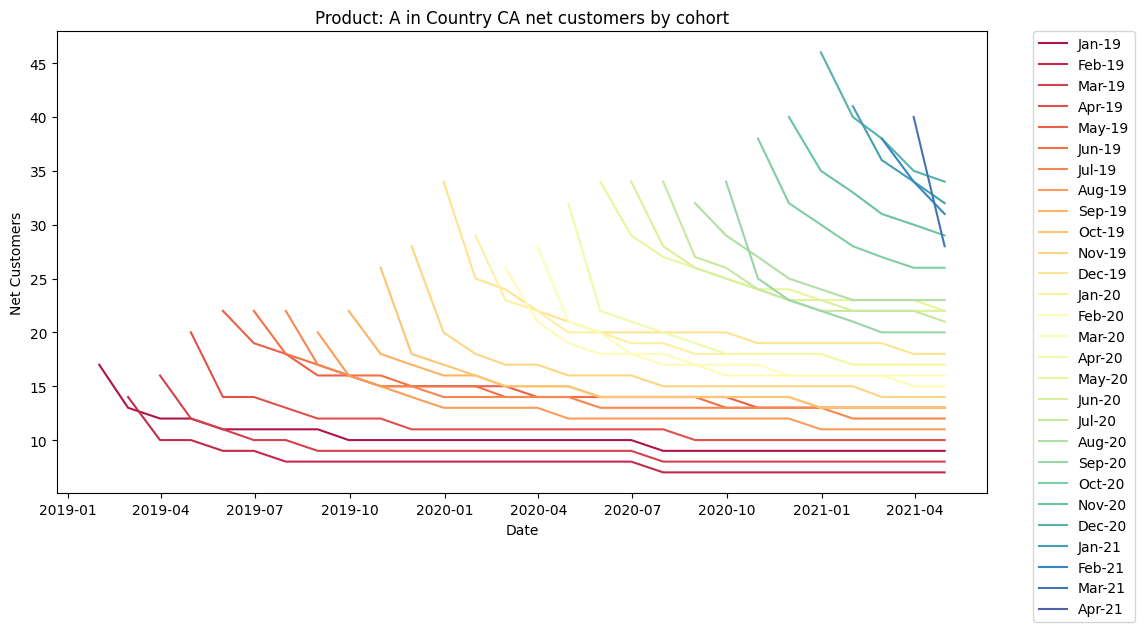

In [59]:
TITLE = f"Product: {PRODUCT} in Country {COUNTRY} net customers by cohort"
plt.figure(figsize=(12,6))
# g = sns.lineplot(data=mini_df[mini_df['Net Customers']>0],hue='Cohort_name',x='Date',y='retention_rate',palette='Spectral')
g = sns.lineplot(data=mini_df[mini_df['Net Customers']>0],hue='Cohort_name',x='Date',y='Net Customers',palette='Spectral')
g.set_title(TITLE)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

### Dependency of retention rate with recency (absolute age cohort)

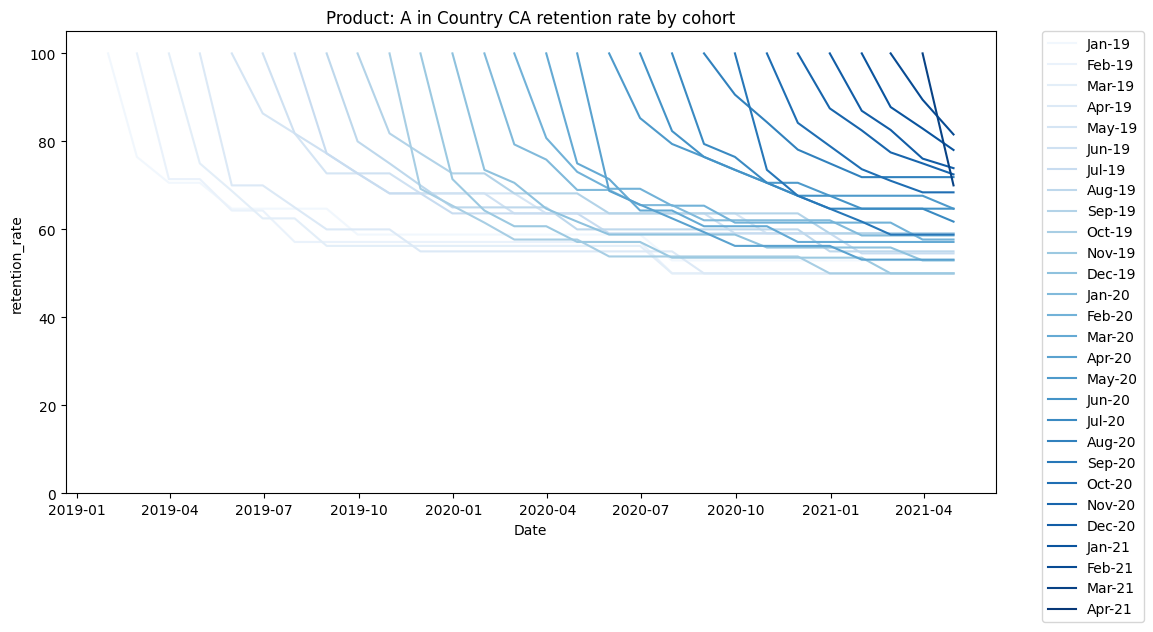

In [60]:
TITLE = f"Product: {PRODUCT} in Country {COUNTRY} retention rate by cohort"
plt.figure(figsize=(12,6))
# g = sns.lineplot(data=mini_df[mini_df['Net Customers']>0],hue='Cohort_name',x='Date',y='retention_rate',palette='Spectral')
g = sns.lineplot(data=mini_df[mini_df['Net Customers']>0],hue='Cohort_name',x='Date',y='retention_rate',palette='Blues')
g.set_title(TITLE)
g.set(ylim=(0,105))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [61]:
# # !pip install lifelines
# import pandas as pd
# from lifelines import KaplanMeierFitter
# from lifelines import ExponentialFitter
# from lifelines.utils import survival_events_from_table

# T, E, W = survival_events_from_table(mini_df.set_index('months_since_acquisition'), observed_deaths_col='churn_customers', censored_col='Net Customers')
# # weights, W, is the number of occurrences of each observation - helps with data compression.

# # kmf = KaplanMeierFitter().fit(T, E, weights=W)
# exf = ExponentialFitter().fit(T+0.0001, E, weights=W)
# T



In [62]:
mini_df.head(3)

,Date,Intake Month,Country,Product,Net Customers,months_since_acquisition,churn_customers,Date_month,Date_year,Cohort_month,Cohort_year,Cohort_size,Cohort_name,retention_rate
1218,2019-01-31,2019-01-31,CA,A,17,0,0.0,1,2019,1,2019,17,Jan-19,100.000000
1219,2019-02-28,2019-01-31,CA,A,13,1,4.0,2,2019,1,2019,17,Jan-19,76.470588
1220,2019-03-31,2019-01-31,CA,A,12,2,1.0,3,2019,1,2019,17,Jan-19,70.588235


### Dependency with months since acquisition

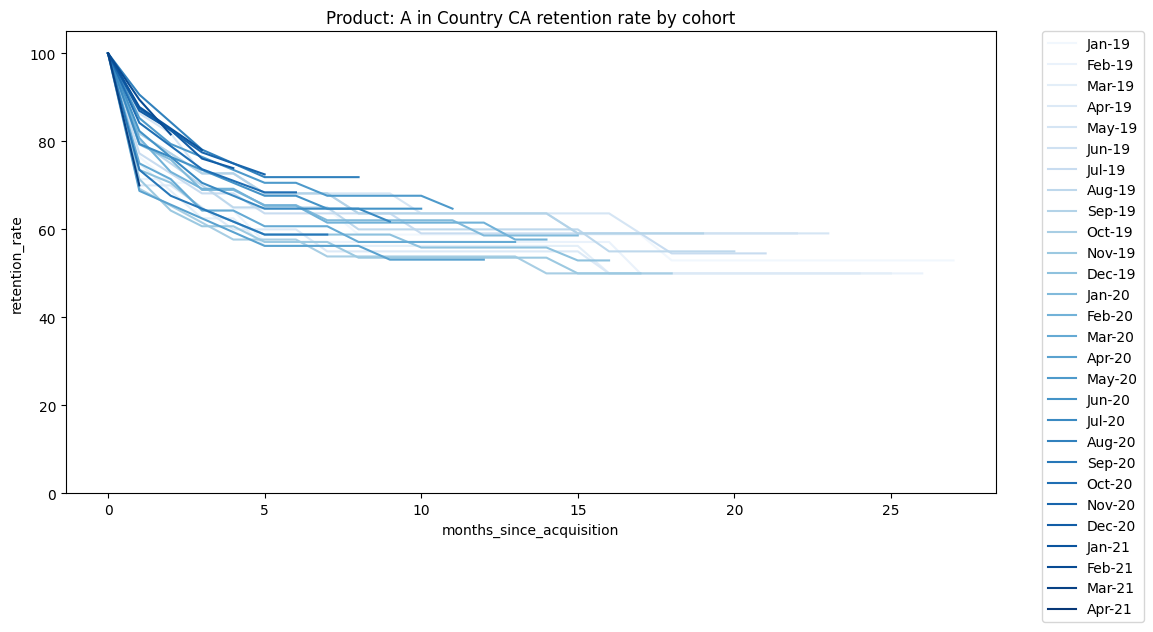

In [63]:
TITLE = f"Product: {PRODUCT} in Country {COUNTRY} retention rate by cohort"
plt.figure(figsize=(12,6))
# g = sns.lineplot(data=mini_df[mini_df['Net Customers']>0],hue='Cohort_name',x='Date',y='retention_rate',palette='Spectral')
g = sns.lineplot(data=mini_df,hue='Cohort_name',x='months_since_acquisition',y='retention_rate',palette='Blues')
g.set_title(TITLE)
g.set(ylim=(0, 105))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [64]:
# mini_df.to_csv('mini')

In [65]:
# df_2[df_2['delta_customers']0

# tmp = df_2[df_2.Product=='B'].groupby(['Country','time_step'])['delta_customers'].mean().reset_index()
# tmp.head()
# sns.relplot(data=tmp,x='time_step',hue='Country',y='delta_customers',alpha=0.5)

### Baseline

In [66]:
# df

In [462]:
# mask = (df['Cohort_year']==2019) & (df['months_since_acquisition']>=6)

df.loc[mask].groupby(['Product','Country','Intake Month'])['retention_rate'].transform('min')

6       51.818182
7       51.818182
8       51.818182
9       51.818182
10      51.818182
          ...    
3513    59.183673
3514    59.183673
3515    59.183673
3516    59.183673
3517    59.183673
Name: retention_rate, Length: 1782, dtype: float64

In [334]:
##Only 2019

mask = (mini_df['Cohort_year']==2019) & (mini_df['months_since_acquisition']>=6)

##retention rate

mini_df.loc[mask,'retention_rate_6m'] = mini_df.loc[mask].groupby(['Product','Country','Intake Month'])['retention_rate'].transform('max')
mini_df.loc[mask,'retention_rate_last'] = mini_df.loc[mask].groupby(['Product','Country','Intake Month'])['retention_rate'].transform('min')
mini_df.loc[mask,'months_since_acquisition_last'] = mini_df.loc[mask].groupby(['Product','Country','Intake Month'])['months_since_acquisition'].transform('max')
mini_df.head(10)

,Date,Intake Month,Country,Product,Net Customers,months_since_acquisition,churn_customers,Date_month,Date_year,Cohort_month,Cohort_year,Cohort_size,Cohort_name,retention_rate,retention_rate_6m,retention_rate_last,months_since_acquisition_last,actuals/forecast
0,2019-01-31,2019-01-31,US,A,110,0,0.0,1,2019,1,2019,110,Jan-19,100.000000,NaN,NaN,NaN,actuals
1,2019-02-28,2019-01-31,US,A,88,1,22.0,2,2019,1,2019,110,Jan-19,80.000000,NaN,NaN,NaN,actuals
2,2019-03-31,2019-01-31,US,A,83,2,5.0,3,2019,1,2019,110,Jan-19,75.454545,NaN,NaN,NaN,actuals
3,2019-04-30,2019-01-31,US,A,77,3,6.0,4,2019,1,2019,110,Jan-19,70.000000,NaN,NaN,NaN,actuals
4,2019-05-31,2019-01-31,US,A,75,4,2.0,5,2019,1,2019,110,Jan-19,68.181818,NaN,NaN,NaN,actuals
5,2019-06-30,2019-01-31,US,A,72,5,3.0,6,2019,1,2019,110,Jan-19,65.454545,NaN,NaN,NaN,actuals
6,2019-07-31,2019-01-31,US,A,71,6,1.0,7,2019,1,2019,110,Jan-19,64.545455,64.545455,51.818182,27.0,actuals
7,2019-08-31,2019-01-31,US,A,70,7,1.0,8,2019,1,2019,110,Jan-19,63.636364,64.545455,51.818182,27.0,actuals
8,2019-09-30,2019-01-31,US,A,69,8,1.0,9,2019,1,2019,110,Jan-19,62.727273,64.545455,51.818182,27.0,actuals
9,2019-10-31,2019-01-31,US,A,69,9,0.0,10,2019,1,2019,110,Jan-19,62.727273,64.545455,51.818182,27.0,actuals


In [289]:
# mini_df[mini_df['Product']=='B'].groupby(['Product','Country','Intake Month'])['months_since_acquisition'].transform('max')

In [335]:
tmp = mini_df[['Product','Country','Intake Month','retention_rate_6m','retention_rate_last','months_since_acquisition_last']].dropna().drop_duplicates()

tmp.head(4)

,Product,Country,Intake Month,retention_rate_6m,retention_rate_last,months_since_acquisition_last
6,A,US,2019-01-31,64.545455,51.818182,27.0
34,A,US,2019-02-28,63.953488,52.325581,26.0
61,A,US,2019-03-31,60.869565,50.000000,25.0
87,A,US,2019-04-30,58.407080,48.672566,24.0


In [336]:
tmp['delta_retention_last_to_6m'] = tmp['retention_rate_last'] - tmp['retention_rate_6m'] 
tmp['months_since_6m'] = tmp['months_since_acquisition_last'] - 6
tmp['retention_slope'] = tmp['delta_retention_last_to_6m'] / tmp['months_since_6m']
tmp

,Product,Country,Intake Month,retention_rate_6m,retention_rate_last,months_since_acquisition_last,delta_retention_last_to_6m,months_since_6m,retention_slope
6,A,US,2019-01-31,64.545455,51.818182,27.0,-12.727273,21.0,-0.606061
34,A,US,2019-02-28,63.953488,52.325581,26.0,-11.627907,20.0,-0.581395
61,A,US,2019-03-31,60.869565,50.000000,25.0,-10.869565,19.0,-0.572082
87,A,US,2019-04-30,58.407080,48.672566,24.0,-9.734513,18.0,-0.540806
112,A,US,2019-05-31,61.290323,51.612903,23.0,-9.677419,17.0,-0.569260
...,...,...,...,...,...,...,...,...,...
3429,C,GB,2019-08-31,60.869565,52.173913,20.0,-8.695652,14.0,-0.621118
3450,C,GB,2019-09-30,67.391304,58.695652,19.0,-8.695652,13.0,-0.668896
3470,C,GB,2019-10-31,59.574468,53.191489,18.0,-6.382979,12.0,-0.531915
3489,C,GB,2019-11-30,56.250000,50.000000,17.0,-6.250000,11.0,-0.568182


In [337]:
mini_df['actuals/forecast'] = 'actuals'
mini_df

,Date,Intake Month,Country,Product,Net Customers,months_since_acquisition,churn_customers,Date_month,Date_year,Cohort_month,Cohort_year,Cohort_size,Cohort_name,retention_rate,retention_rate_6m,retention_rate_last,months_since_acquisition_last,actuals/forecast
0,2019-01-31,2019-01-31,US,A,110,0,0.0,1,2019,1,2019,110,Jan-19,100.000000,NaN,NaN,NaN,actuals
1,2019-02-28,2019-01-31,US,A,88,1,22.0,2,2019,1,2019,110,Jan-19,80.000000,NaN,NaN,NaN,actuals
2,2019-03-31,2019-01-31,US,A,83,2,5.0,3,2019,1,2019,110,Jan-19,75.454545,NaN,NaN,NaN,actuals
3,2019-04-30,2019-01-31,US,A,77,3,6.0,4,2019,1,2019,110,Jan-19,70.000000,NaN,NaN,NaN,actuals
4,2019-05-31,2019-01-31,US,A,75,4,2.0,5,2019,1,2019,110,Jan-19,68.181818,NaN,NaN,NaN,actuals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,2021-03-31,2021-02-28,GB,C,47,1,13.0,3,2021,2,2021,60,Feb-21,78.333333,NaN,NaN,NaN,actuals
3650,2021-04-30,2021-02-28,GB,C,44,2,3.0,4,2021,2,2021,60,Feb-21,73.333333,NaN,NaN,NaN,actuals
3651,2021-03-31,2021-03-31,GB,C,61,0,0.0,3,2021,3,2021,61,Mar-21,100.000000,NaN,NaN,NaN,actuals
3652,2021-04-30,2021-03-31,GB,C,44,1,17.0,4,2021,3,2021,61,Mar-21,72.131148,NaN,NaN,NaN,actuals


In [320]:
intake_months = ['2019-01-31', '2019-01-31','2019-01-31', '2019-01-31','2019-01-31']
products = ['A','B','C']
countries = ['CA','GB','US']

In [321]:
start_period = "2021-05-31"
end_period = pd.to_datetime(start_period) + pd.DateOffset(months=23)

forecast_dates = pd.date_range(start=start_period, end=end_period, freq='M')
# forecast_dates = pd.Series(date_range)

print(forecast_dates)

DatetimeIndex(['2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31',
               '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
               '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31',
               '2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30'],
              dtype='datetime64[ns]', freq='M')


In [322]:
##Create forecast template
# cartesian_product_intake = list(product(forecast_dates,products, countries))
# df_forecast_intake = pd.DataFrame(cartesian_product_intake, columns=['Date', 'Product', 'Country'])
# df_forecast_intake['Intake'] = 0
# df_forecast_intake.to_csv('df_forecast_intake.csv',index=False)

# Import forecast
df_forecast_intake = pd.read_csv('saved_forecast_intake.csv',usecols=['Date','Country','Product','Intake','Type'],parse_dates=[0])
print(f"shape df forecast: {df_forecast_intake.shape}")
df_forecast_intake.head()

shape df forecast: (216, 5)


,Date,Country,Product,Intake,Type
0,2021-05-31,CA,A,46,Forecast
1,2021-05-31,GB,A,134,Forecast
2,2021-05-31,US,A,148,Forecast
3,2021-05-31,CA,B,33,Forecast
4,2021-05-31,GB,B,143,Forecast


In [189]:
# df_forecast_intake[df_forecast_intake['Intake']!=0]

In [323]:
intake_months_old_cohorts = df['Intake Month'].unique().tolist()
intake_months_new_cohorts = df_forecast_intake['Date'].unique().tolist()
intake_months = intake_months_old_cohorts + intake_months_new_cohorts

products = df['Product'].unique()
countries = df['Country'].unique()

# Create a Cartesian product of the lists
cartesian_product_net_customers = list(product(forecast_dates, intake_months, products, countries))

# Create a DataFrame from the Cartesian product
df_forecast_net_customers = pd.DataFrame(cartesian_product_net_customers, columns=['Date', 'Intake Month', 'Product', 'Country'])

df_forecast_net_customers[df_forecast_net_customers['Intake Month']<=df_forecast_net_customers['Date']].reset_index(drop=True) #remove the lines where 'Intake Month' > 'Date'
df_forecast_net_customers

,Date,Intake Month,Product,Country
0,2021-05-31,2019-01-31,A,US
1,2021-05-31,2019-01-31,A,CA
2,2021-05-31,2019-01-31,A,GB
3,2021-05-31,2019-01-31,B,US
4,2021-05-31,2019-01-31,B,CA
...,...,...,...,...
11227,2023-04-30,2023-04-30,B,CA
11228,2023-04-30,2023-04-30,B,GB
11229,2023-04-30,2023-04-30,C,US
11230,2023-04-30,2023-04-30,C,CA


In [324]:
date_split_past_future = '2021-04-30'

df_forecast_net_customers['Cohort_type'] = 'old'
df_forecast_net_customers.loc[df_forecast_net_customers['Intake Month']>date_split_past_future,'Cohort_type'] = 'new'
df_forecast_net_customers


,Date,Intake Month,Product,Country,Cohort_type
0,2021-05-31,2019-01-31,A,US,old
1,2021-05-31,2019-01-31,A,CA,old
2,2021-05-31,2019-01-31,A,GB,old
3,2021-05-31,2019-01-31,B,US,old
4,2021-05-31,2019-01-31,B,CA,old
...,...,...,...,...,...
11227,2023-04-30,2023-04-30,B,CA,new
11228,2023-04-30,2023-04-30,B,GB,new
11229,2023-04-30,2023-04-30,C,US,new
11230,2023-04-30,2023-04-30,C,CA,new


In [338]:
date_split_past_train_valid = '2019-12-31'

df_train = df_forecast_net_customers.loc[df_forecast_net_customers['Intake Month']<=date_split_past_train_valid]
df_valid = df_forecast_net_customers.loc[(df_forecast_net_customers['Intake Month']>date_split_past_train_valid)&(df_forecast_net_customers['Cohort_type']=='old')]
df_train

,Date,Intake Month,Product,Country,Cohort_type
0,2021-05-31,2019-01-31,A,US,old
1,2021-05-31,2019-01-31,A,CA,old
2,2021-05-31,2019-01-31,A,GB,old
3,2021-05-31,2019-01-31,B,US,old
4,2021-05-31,2019-01-31,B,CA,old
...,...,...,...,...,...
10867,2023-04-30,2019-12-31,B,CA,old
10868,2023-04-30,2019-12-31,B,GB,old
10869,2023-04-30,2019-12-31,C,US,old
10870,2023-04-30,2019-12-31,C,CA,old


In [295]:
df.head()

,Date,Intake Month,Country,Product,Net Customers,months_since_acquisition,churn_customers,Date_month,Date_year,Cohort_month,Cohort_year,Cohort_size,Cohort_name,retention_rate
0,2019-01-31,2019-01-31,US,A,110,0,0.0,1,2019,1,2019,110,Jan-19,100.000000
1,2019-02-28,2019-01-31,US,A,88,1,22.0,2,2019,1,2019,110,Jan-19,80.000000
2,2019-03-31,2019-01-31,US,A,83,2,5.0,3,2019,1,2019,110,Jan-19,75.454545
3,2019-04-30,2019-01-31,US,A,77,3,6.0,4,2019,1,2019,110,Jan-19,70.000000
4,2019-05-31,2019-01-31,US,A,75,4,2.0,5,2019,1,2019,110,Jan-19,68.181818


In [339]:
df_train = df_train.merge(df[['Product','Country','Intake Month','Cohort_size']].drop_duplicates(),how='left',on=['Product','Country','Intake Month'])
df_valid = df_valid.merge(df[['Product','Country','Intake Month','Cohort_size']].drop_duplicates(),how='left',on=['Product','Country','Intake Month'])

df_train

,Date,Intake Month,Product,Country,Cohort_type,Cohort_size
0,2021-05-31,2019-01-31,A,US,old,110
1,2021-05-31,2019-01-31,A,CA,old,17
2,2021-05-31,2019-01-31,A,GB,old,96
3,2021-05-31,2019-01-31,B,US,old,0
4,2021-05-31,2019-01-31,B,CA,old,0
...,...,...,...,...,...,...
2587,2023-04-30,2019-12-31,B,CA,old,54
2588,2023-04-30,2019-12-31,B,GB,old,189
2589,2023-04-30,2019-12-31,C,US,old,56
2590,2023-04-30,2019-12-31,C,CA,old,8


In [184]:
# df_forecast_net_customers['Cohort_size'] = 0
# # df_forecast_net_customers.loc[df_forecast_net_customers['Cohort_type']=='old','Cohort_size']
# df_forecast_net_customers.loc[df_forecast_net_customers['Cohort_type']=='old','Cohort_size'] = df_forecast_net_customers.loc[df_forecast_net_customers['Cohort_type']=='old'].merge(df[['Product','Country','Intake Month','Cohort_size']],how='left',on=['Product','Country','Intake Month'])['Cohort_size_y']
# df_forecast_net_customers

In [234]:
df_forecast_intake

,Date,Country,Product,Intake,Type
0,2021-05-31,CA,A,46,Forecast
1,2021-05-31,GB,A,134,Forecast
2,2021-05-31,US,A,148,Forecast
3,2021-05-31,CA,B,33,Forecast
4,2021-05-31,GB,B,143,Forecast
...,...,...,...,...,...
211,2023-04-30,GB,B,0,Forecast
212,2023-04-30,US,B,0,Forecast
213,2023-04-30,CA,C,12,Forecast
214,2023-04-30,GB,C,81,Forecast


In [129]:
# tmp.to_csv('slopes.csv',index=False)

In [374]:
# mask = (df_train['Product']=='A') & (df_train['Country']=='CA') & (df_train['Intake Month'].isin(['2019-01-31','2020-01-31','2022-07-31']))
# tt = df_train.loc[mask].copy()
tt = df_train.copy()

tt = tt.sort_values(by=['Product','Country','Intake Month','Date']).reset_index(drop=True)
tt

,Date,Intake Month,Product,Country,Cohort_type,Cohort_size
0,2021-05-31,2019-01-31,A,CA,old,17
1,2021-06-30,2019-01-31,A,CA,old,17
2,2021-07-31,2019-01-31,A,CA,old,17
3,2021-08-31,2019-01-31,A,CA,old,17
4,2021-09-30,2019-01-31,A,CA,old,17
...,...,...,...,...,...,...
2587,2022-12-31,2019-12-31,C,US,old,56
2588,2023-01-31,2019-12-31,C,US,old,56
2589,2023-02-28,2019-12-31,C,US,old,56
2590,2023-03-31,2019-12-31,C,US,old,56


In [375]:
date_year, date_month = get_date_int(tt, 'Date')

cohort_year, cohort_month = get_date_int(tt, 'Intake Month')

# Calculate difference in years
years_diff = date_year - cohort_year

# Calculate difference in months
months_diff = date_month - cohort_month

# Extract the difference in months from all previous values

tt['months_since_acquisition'] = years_diff * 12 + months_diff
tt.head()

,Date,Intake Month,Product,Country,Cohort_type,Cohort_size,months_since_acquisition
0,2021-05-31,2019-01-31,A,CA,old,17,28
1,2021-06-30,2019-01-31,A,CA,old,17,29
2,2021-07-31,2019-01-31,A,CA,old,17,30
3,2021-08-31,2019-01-31,A,CA,old,17,31
4,2021-09-30,2019-01-31,A,CA,old,17,32


In [376]:
tmp[['Product','Country','Intake Month','months_since_acquisition_last','retention_rate_last','retention_slope']]

,Product,Country,Intake Month,months_since_acquisition_last,retention_rate_last,retention_slope
6,A,US,2019-01-31,27.0,51.818182,-0.606061
34,A,US,2019-02-28,26.0,52.325581,-0.581395
61,A,US,2019-03-31,25.0,50.000000,-0.572082
87,A,US,2019-04-30,24.0,48.672566,-0.540806
112,A,US,2019-05-31,23.0,51.612903,-0.569260
...,...,...,...,...,...,...
3429,C,GB,2019-08-31,20.0,52.173913,-0.621118
3450,C,GB,2019-09-30,19.0,58.695652,-0.668896
3470,C,GB,2019-10-31,18.0,53.191489,-0.531915
3489,C,GB,2019-11-30,17.0,50.000000,-0.568182


In [217]:
# tt_old.merge(tmp[['Product','Country','Intake Month','retention_rate_last','retention_slope']],how='left',on=['Product','Country','Intake Month'])

In [343]:
tt.head()

,Date,Intake Month,Product,Country,Cohort_type,Cohort_size,months_since_acquisition
0,2021-05-31,2019-01-31,A,CA,old,17,28
1,2021-06-30,2019-01-31,A,CA,old,17,29
2,2021-07-31,2019-01-31,A,CA,old,17,30
3,2021-08-31,2019-01-31,A,CA,old,17,31
4,2021-09-30,2019-01-31,A,CA,old,17,32


In [377]:
tt = tt.merge(tmp[['Product','Country','Intake Month','months_since_acquisition_last','retention_rate_last','retention_slope']],how='left',on=['Product','Country','Intake Month'])
tt['delta_months_for_forecast'] = tt['months_since_acquisition'] - tt['months_since_acquisition_last']
tt['forecast_retention_rates'] = tt['retention_rate_last'] + tt['delta_months_for_forecast'] * tt['retention_slope']
tt['forecast_retention_rates'] = tt['forecast_retention_rates']

tt['forecast_net_customers'] = tt['forecast_retention_rates']/100 * tt['Cohort_size']
tt['forecast_net_customers'] = tt['forecast_net_customers'].fillna(0)


tt.head()

,Date,Intake Month,Product,Country,Cohort_type,Cohort_size,months_since_acquisition,months_since_acquisition_last,retention_rate_last,retention_slope,delta_months_for_forecast,forecast_retention_rates,forecast_net_customers
0,2021-05-31,2019-01-31,A,CA,old,17,28,27.0,52.941176,-0.560224,1.0,52.380952,8.904762
1,2021-06-30,2019-01-31,A,CA,old,17,29,27.0,52.941176,-0.560224,2.0,51.820728,8.809524
2,2021-07-31,2019-01-31,A,CA,old,17,30,27.0,52.941176,-0.560224,3.0,51.260504,8.714286
3,2021-08-31,2019-01-31,A,CA,old,17,31,27.0,52.941176,-0.560224,4.0,50.700280,8.619048
4,2021-09-30,2019-01-31,A,CA,old,17,32,27.0,52.941176,-0.560224,5.0,50.140056,8.523810


In [352]:
tt.to_csv('testing_forecast_2019.csv',index=False)

In [378]:
# date_split_past_train_valid = '2019-12-31'

tt_past = df.loc[df['Intake Month']<=date_split_past_train_valid]
tt_past

,Date,Intake Month,Country,Product,Net Customers,months_since_acquisition,churn_customers,Date_month,Date_year,Cohort_month,Cohort_year,Cohort_size,Cohort_name,retention_rate
0,2019-01-31,2019-01-31,US,A,110,0,0.0,1,2019,1,2019,110,Jan-19,100.000000
1,2019-02-28,2019-01-31,US,A,88,1,22.0,2,2019,1,2019,110,Jan-19,80.000000
2,2019-03-31,2019-01-31,US,A,83,2,5.0,3,2019,1,2019,110,Jan-19,75.454545
3,2019-04-30,2019-01-31,US,A,77,3,6.0,4,2019,1,2019,110,Jan-19,70.000000
4,2019-05-31,2019-01-31,US,A,75,4,2.0,5,2019,1,2019,110,Jan-19,68.181818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513,2020-12-31,2019-12-31,GB,C,30,12,0.0,12,2020,12,2019,49,Dec-19,61.224490
3514,2021-01-31,2019-12-31,GB,C,30,13,0.0,1,2021,12,2019,49,Dec-19,61.224490
3515,2021-02-28,2019-12-31,GB,C,29,14,1.0,2,2021,12,2019,49,Dec-19,59.183673
3516,2021-03-31,2019-12-31,GB,C,29,15,0.0,3,2021,12,2019,49,Dec-19,59.183673


In [429]:
df_retention_rates = pd.concat([tt[['Product','Country','Date','Intake Month','months_since_acquisition','forecast_retention_rates']].rename(columns={'forecast_retention_rates':'retention_rate'}),
                               tt_past[['Product','Country','Date','Intake Month','months_since_acquisition','retention_rate']]],
                               axis=0)
df_retention_rates

,Product,Country,Date,Intake Month,months_since_acquisition,retention_rate
0,A,CA,2021-05-31,2019-01-31,28,52.380952
1,A,CA,2021-06-30,2019-01-31,29,51.820728
2,A,CA,2021-07-31,2019-01-31,30,51.260504
3,A,CA,2021-08-31,2019-01-31,31,50.700280
4,A,CA,2021-09-30,2019-01-31,32,50.140056
...,...,...,...,...,...,...
3513,C,GB,2020-12-31,2019-12-31,12,61.224490
3514,C,GB,2021-01-31,2019-12-31,13,61.224490
3515,C,GB,2021-02-28,2019-12-31,14,59.183673
3516,C,GB,2021-03-31,2019-12-31,15,59.183673


In [430]:
df_retention_rates = df_retention_rates.sort_values(by=['Product','Country','Intake Month','Date'],ascending=True).reset_index(drop=True)
# df_retention_rates
df_retention_rates['diff_retention_rate'] = df_retention_rates.groupby(['Product','Country','Intake Month'])['retention_rate'].diff()

#we fillna with 0 but only on the ones where there is a retention rate (ex: for B Product, there is no retention rate so we keep NaN)
df_retention_rates.loc[~df_retention_rates['retention_rate'].isnull(),'diff_retention_rate'] = df_retention_rates.loc[~df_retention_rates['retention_rate'].isnull(),'diff_retention_rate'].fillna(0)
# df_retention_rates.loc[~df_retention_rates['retention_rate'].isnull(),'diff_retention_rates'] 

In [426]:
# df_retention_rates[(df_retention_rates['Product']=='B')&(df_retention_rates['Country']=='CA')&(df_retention_rates['Intake Month']=='2019-05-31')]

In [427]:
df_retention_rates.to_csv('testing_df_retention_rates_2.csv',index=False)

In [442]:
fitted_retention_rates = df_retention_rates.groupby(['Product','Country','months_since_acquisition'])['diff_retention_rate'].mean().ffill().reset_index() #the ffill is for Product B who hasn't have more than 40 something months since acquisition
# fitted_retention_rates['diff_retention_rate']
fitted_retention_rates.head()

,Product,Country,months_since_acquisition,diff_retention_rate
0,A,CA,0,0.000000
1,A,CA,1,-23.803280
2,A,CA,2,-4.103697
3,A,CA,3,-4.951672
4,A,CA,4,-1.889140


In [451]:
cum_f = fitted_retention_rates.head(5)
cum_f['cum_diff_rr'] = cum_f.groupby(['Product','Country'])['diff_retention_rate'].cumsum()
cum_f['forecast_rr'] = 100 + cum_f['cum_diff_rr'] 
cum_f['Cohort size'] = 10

cum_f

,Product,Country,months_since_acquisition,diff_retention_rate,cum_diff_rr,forecast_rr,Cohort size
0,A,CA,0,0.000000,0.000000,100.000000,10
1,A,CA,1,-23.803280,-23.803280,76.196720,10
2,A,CA,2,-4.103697,-27.906977,72.093023,10
3,A,CA,3,-4.951672,-32.858649,67.141351,10
4,A,CA,4,-1.889140,-34.747789,65.252211,10


In [456]:
tt_valid = df_valid.copy()
tt_valid  = tt_valid.merge(tmp[['Product','Country','Intake Month','months_since_acquisition_last','retention_rate_last','retention_slope']],how='left',on=['Product','Country','Intake Month'])
tt_valid
# tt['delta_months_for_forecast'] = tt['months_since_acquisition'] - tt['months_since_acquisition_last']
# tt['forecast_retention_rates'] = tt['retention_rate_last'] + tt['delta_months_for_forecast'] * tt['retention_slope']
# tt['forecast_retention_rates'] = tt['forecast_retention_rates']

# tt['forecast_net_customers'] = tt['forecast_retention_rates']/100 * tt['Cohort_size']
# tt['forecast_net_customers'] = tt['forecast_net_customers'].fillna(0)

,Date,Intake Month,Product,Country,Cohort_type,Cohort_size,months_since_acquisition_last,retention_rate_last,retention_slope
0,2021-05-31,2020-01-31,A,US,old,122,NaN,NaN,NaN
1,2021-05-31,2020-01-31,A,CA,old,29,NaN,NaN,NaN
2,2021-05-31,2020-01-31,A,GB,old,106,NaN,NaN,NaN
3,2021-05-31,2020-01-31,B,US,old,0,NaN,NaN,NaN
4,2021-05-31,2020-01-31,B,CA,old,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3451,2023-04-30,2021-04-30,B,CA,old,0,NaN,NaN,NaN
3452,2023-04-30,2021-04-30,B,GB,old,0,NaN,NaN,NaN
3453,2023-04-30,2021-04-30,C,US,old,63,NaN,NaN,NaN
3454,2023-04-30,2021-04-30,C,CA,old,10,NaN,NaN,NaN


In [457]:
tmp[['Product','Country','Intake Month','months_since_acquisition_last','retention_rate_last','retention_slope']]

,Product,Country,Intake Month,months_since_acquisition_last,retention_rate_last,retention_slope
6,A,US,2019-01-31,27.0,51.818182,-0.606061
34,A,US,2019-02-28,26.0,52.325581,-0.581395
61,A,US,2019-03-31,25.0,50.000000,-0.572082
87,A,US,2019-04-30,24.0,48.672566,-0.540806
112,A,US,2019-05-31,23.0,51.612903,-0.569260
...,...,...,...,...,...,...
3429,C,GB,2019-08-31,20.0,52.173913,-0.621118
3450,C,GB,2019-09-30,19.0,58.695652,-0.668896
3470,C,GB,2019-10-31,18.0,53.191489,-0.531915
3489,C,GB,2019-11-30,17.0,50.000000,-0.568182
